In [8]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import matplotlib as mpl

def bilinear_interpolate(r, c ,I):
    kiri_c = int(c)
    kanan_c = kiri_c+1
    nilai_kiri_c = c - kiri_c
    nilai_kanan_c = 1 - nilai_kiri_c
    atas_r = int(r)
    bawah_r = atas_r + 1
    nilai_atas_r = r - atas_r
    nilai_bawah_r = bawah_r - r
    
    if kiri_c >= 0 and kanan_c < I.shape[1] and atas_r >= 0 and  bawah_r < I.shape[0]:
        a = nilai_kanan_c * I[atas_r , kiri_c] + nilai_kiri_c * I[atas_r, kanan_c]
        b = nilai_kiri_c * I[bawah_r , kanan_c] + nilai_kanan_c * I[bawah_r, kiri_c]
        c = nilai_atas_r * b + nilai_bawah_r * a
        return np.int32(c)
    else:
        return 0

def ukuran_asli_rgb(gambar) :
    dpi = mpl.rcParams['figure.dpi']
    h, w = gambar.shape[0:2]
    figsize = h/float(dpi), w/float(dpi)
    fgr = plt.figure(figsize = figsize)
    plt.imshow(gambar, cmap = 'gray')
    plt.show()

def rotasi_frameAffine_projective(rumus, rmax, cmax):

    rmin = 0
    cmin = 0

    sudutgam = np.array([[rmin, cmin, 1], [rmin, cmax-1, 1], [rmax, cmax-1, 1], [rmax-1, cmin, 1]])

    gambar_dash = rumus.dot(sudutgam.T)
    gambar_dash = gambar_dash/gambar_dash[2,:]
    
    dashMin = gambar_dash.min(axis=1)
    dashMax = gambar_dash.max(axis=1)


    rMin = np.int64(np.floor(dashMin[0]))
    cMin = np.int64(np.floor(dashMin[1]))
    rMax = np.int64(np.ceil(dashMax[0]))
    cMax = np.int64(np.ceil(dashMax[1]))

    h, w = rMax - rMin + 1 , cMax - cMin + 1 

#     wadah = np.zeros((h,w),dtype='int64')
#     wadah
    return h, w, rMin, cMin, rMax, cMax

def f_transformasiAffine_projective(rumus,img):
    rmax = img.shape[0]
    cmax = img.shape[1]
    h, w, rMin, cMin, rMax, cMax = rotasi_frameAffine_projective(rumus, rmax, cmax )
    hasil = np.zeros((h,w), dtype ='int64')
    Tinv = np.linalg.inv(rumus)
    for new_i in range(rMin, rMax):
        for new_j in range(cMin, cMax):
            P_dash = np.array([new_i,new_j,1])
            P = Tinv.dot(P_dash)
            P = P/P[2]
    #         P = np.int16(np.floor(P))
            i , j = P[0] , P[1]
            if i < 0 or i>=rmax or j<0 or j>=cmax:
                pass
            else:
                g = bilinear_interpolate(i, j, img)
                hasil[new_i-rMin,new_j-cMin] = g
    return hasil

def perbesar_interpolate(s, I):
    baris = I.shape[0]
    kolom = I.shape[1]
    S = get_scaling_matrix(s)
    I3 = np.zeros((int(s[0])*baris,int(s[1])*kolom),dtype='uint8')
    Tinv = np.linalg.inv(S)
    for new_i in range(I3.shape[0]):
        for new_j in range(I3.shape[1]):
            P_dash = np.array([new_i,new_j])
            P = Tinv.dot(P_dash)
    #         P = np.int16(np.floor(P))
            i , j = P[0] , P[1]
            if i < 0 or i>=baris or j<0 or j>=kolom:
                pass
            else:
                g = bilinear_interpolate(i, j, I)
                I3[new_i,new_j] = g
    return I3

def get_scaling_matrix(scale):
    size = len(scale)
    matrix = np.zeros((size,size))
    for i,_ in enumerate(matrix):
        matrix[i][i] = scale[i]
    return matrix

In [39]:
im = cv2.imread(r'binnary.png', cv2.IMREAD_GRAYSCALE)


In [40]:
# T = np.array([[0.01,0,0],[0,0.01,0],[0,0,1]])
# f_transformasiAffine_projective(T, im)

# perbesar_interpolate(get_scaling_matrix([3,5]),im)

In [41]:
# cv2.imshow('gray', im)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
im

array([[255, 255, 255, ..., 255, 255, 255],
       [255,   0,   0, ...,   0,   0, 255],
       [255,   0,   0, ...,   0,   0, 255],
       ...,
       [255, 255,   0, ...,   0,   0, 255],
       [255, 255,   0, ...,   0,   0, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [42]:
im_b = im >50
im_b

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True, False, False, ..., False, False,  True],
       [ True, False, False, ..., False, False,  True],
       ...,
       [ True,  True, False, ..., False, False,  True],
       [ True,  True, False, ..., False, False,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

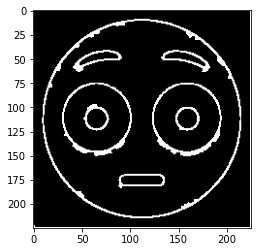

In [44]:
plt.imshow(im_b, cmap = 'gray')

In [45]:
np.unique(im_b)

array([False,  True])

In [46]:
type(im_b)

numpy.ndarray

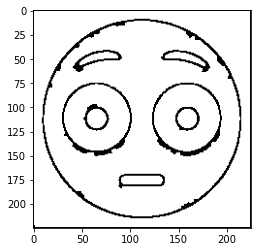

In [47]:
plt.imshow(~(im_b), cmap = 'gray')

In [112]:
k_r = cv2.getStructuringElement(cv2.MORPH_RECT,(4,4))
k_e = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(4,4))
k_c = cv2.getStructuringElement(cv2.MORPH_CROSS,(4,4))

In [113]:
k_r

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=uint8)

In [114]:
k_e

array([[0, 0, 1, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1]], dtype=uint8)

In [115]:
k_c

array([[0, 0, 1, 0],
       [0, 0, 1, 0],
       [1, 1, 1, 1],
       [0, 0, 1, 0]], dtype=uint8)

In [116]:
E_r = cv2.erode(im, k_r)
E_e = cv2.erode(im, k_e)
E_c = cv2.erode(im, k_c)

(-0.5, 224.5, 224.5, -0.5)

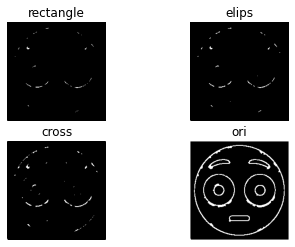

In [121]:
plt.subplot(221)
plt.imshow(E_r, cmap='gray')
plt.title('rectangle')
plt.axis('off')
plt.subplot(222)
plt.imshow(E_e, cmap='gray')
plt.title('elips')
plt.axis('off')
plt.subplot(223)
plt.imshow(E_c, cmap='gray')
plt.title('cross')
plt.axis('off')
plt.subplot(224)
plt.imshow(im, cmap='gray')
plt.title('ori')
plt.axis('off')

In [122]:
D_r = cv2.dilate(im, k_r)
D_e = cv2.dilate(im, k_e)
D_c = cv2.dilate(im, k_c)

(-0.5, 224.5, 224.5, -0.5)

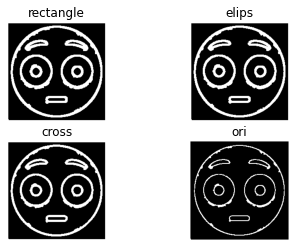

In [123]:
plt.subplot(221)
plt.imshow(D_r, cmap='gray')
plt.title('rectangle')
plt.axis('off')
plt.subplot(222)
plt.imshow(D_e, cmap='gray')
plt.title('elips')
plt.axis('off')
plt.subplot(223)
plt.imshow(D_c, cmap='gray')
plt.title('cross')
plt.axis('off')
plt.subplot(224)
plt.imshow(im, cmap='gray')
plt.title('ori')
plt.axis('off')

In [124]:
im.dtype

dtype('uint8')

In [126]:
im_bool = np.array(im,dtype=np.bool)

In [128]:
im_bool

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True, False, False, ..., False, False,  True],
       [ True, False, False, ..., False, False,  True],
       ...,
       [ True,  True, False, ..., False, False,  True],
       [ True,  True, False, ..., False, False,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [129]:
im_bool.dtype

dtype('bool')

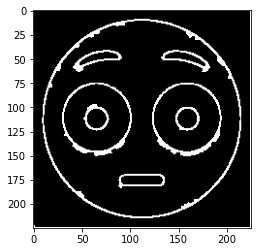

In [130]:
plt.imshow(im_bool, cmap='gray')

In [137]:
rand = np.random.rand(im.shape[0],im.shape[1])

In [138]:
rand.shape

(225, 225)

In [139]:
rand

array([[0.01168631, 0.30012901, 0.7281128 , ..., 0.80153221, 0.300267  ,
        0.53994255],
       [0.59294367, 0.2407877 , 0.29087169, ..., 0.8409297 , 0.54633827,
        0.76254835],
       [0.90282037, 0.66775811, 0.69286896, ..., 0.78194302, 0.78869169,
        0.27145421],
       ...,
       [0.1115518 , 0.19698025, 0.10591614, ..., 0.4857935 , 0.01662067,
        0.03810988],
       [0.7300046 , 0.85289511, 0.5921517 , ..., 0.99886951, 0.85027492,
        0.48621663],
       [0.63463182, 0.25552058, 0.5862134 , ..., 0.7347902 , 0.74433818,
        0.66791814]])

In [148]:
titik = rand > 0.97

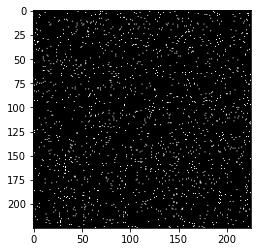

In [149]:
plt.imshow(titik, cmap='gray')

In [150]:
gabung = im_bool | titik

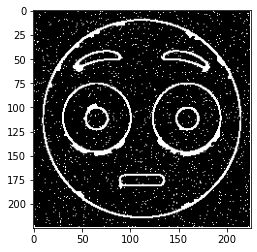

In [151]:
plt.imshow(gabung, cmap='gray')

In [162]:
opn = cv2.morphologyEx(im, cv2.MORPH_OPEN ,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2)))

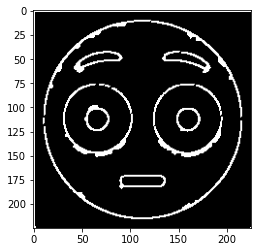

In [163]:
plt.imshow(opn, cmap='gray')

In [165]:
gabung_and = im_bool & titik

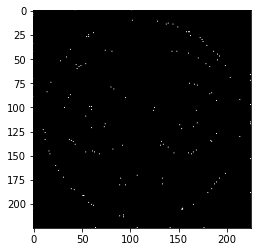

In [166]:
plt.imshow(gabung_and, cmap='gray')

In [167]:
 R = cv2.morphologyEx(im, cv2.MORPH_CLOSE ,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(2,2)))

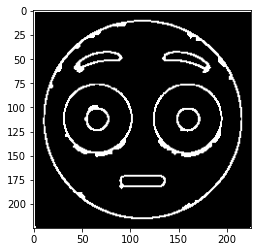

In [168]:
plt.imshow(R, cmap='gray')

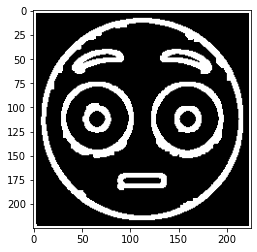

In [169]:
plt.imshow(D_r, cmap='gray')

In [174]:
gradient = cv2.morphologyEx(D_r, cv2.MORPH_GRADIENT ,cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)))

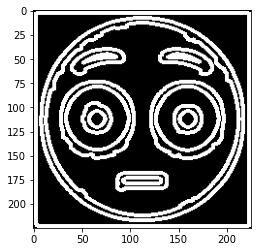

In [175]:
plt.imshow(gradient, cmap='gray')

In [187]:
top_hat =cv2.morphologyEx(D_r, cv2.MORPH_TOPHAT ,cv2.getStructuringElement(cv2.MORPH_RECT,(2,2)))

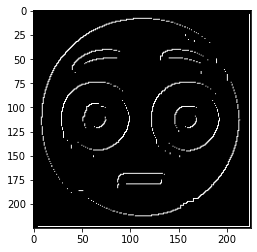

In [188]:
plt.imshow(top_hat, cmap='gray')

In [189]:
black_hat =cv2.morphologyEx(D_r, cv2.MORPH_BLACKHAT ,cv2.getStructuringElement(cv2.MORPH_RECT,(2,2)))

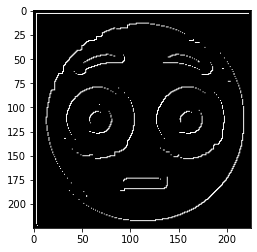

In [190]:
plt.imshow(black_hat, cmap='gray')